In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

dataset91 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short91_f1_000.csv.gz',index_col=False)
dataset92 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short92_e2_000.csv.gz',index_col=False)
dataset93 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short93_d2_000.csv.gz',index_col=False)
dataset94 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short94_c2_000.csv.gz',index_col=False)
dataset = pd.concat([dataset91, dataset92, dataset93, dataset94])
#print(dataset.ECM.unique())

In [2]:
#section 1: 
lum1 = 711.1 #luminosity for this section
condition1 = np.abs(dataset91.ECM-88.5) < 0.1 #ECM for this section is near 88.5
dataset91.loc[condition1, "LUM"] = lum1 #set the luminosity under row "LUM"


#section 2: 
lum2 = 632.7
condition2 = np.abs(dataset91.ECM-89.5) < 0.1
dataset91.loc[condition2, "LUM"] = lum2


#section 3: 
lum3 = 622.6
condition3 = np.abs(dataset91.ECM-90.2) < 0.1
dataset91.loc[condition3 , "LUM"] = lum3


#section 4: 
lum4 = 2482.5
condition4 = np.abs(dataset91.ECM-91.2) < 0.1
dataset91.loc[condition4, "LUM"] = lum4


#section 5: 
lum5 = 666.1
condition5 = np.abs(dataset91.ECM-92) < 0.1
dataset91.loc[condition5, "LUM"] = lum5


#section 6: 
lum6 = 634.6
condition6 = np.abs(dataset91.ECM-93) < 0.1
dataset91.loc[condition6, "LUM"] = lum6


#section 7: 
lum7 = 681.2
condition7 = np.abs(dataset91.ECM-93.7) < 0.1
dataset91.loc[condition7, "LUM"] = lum7

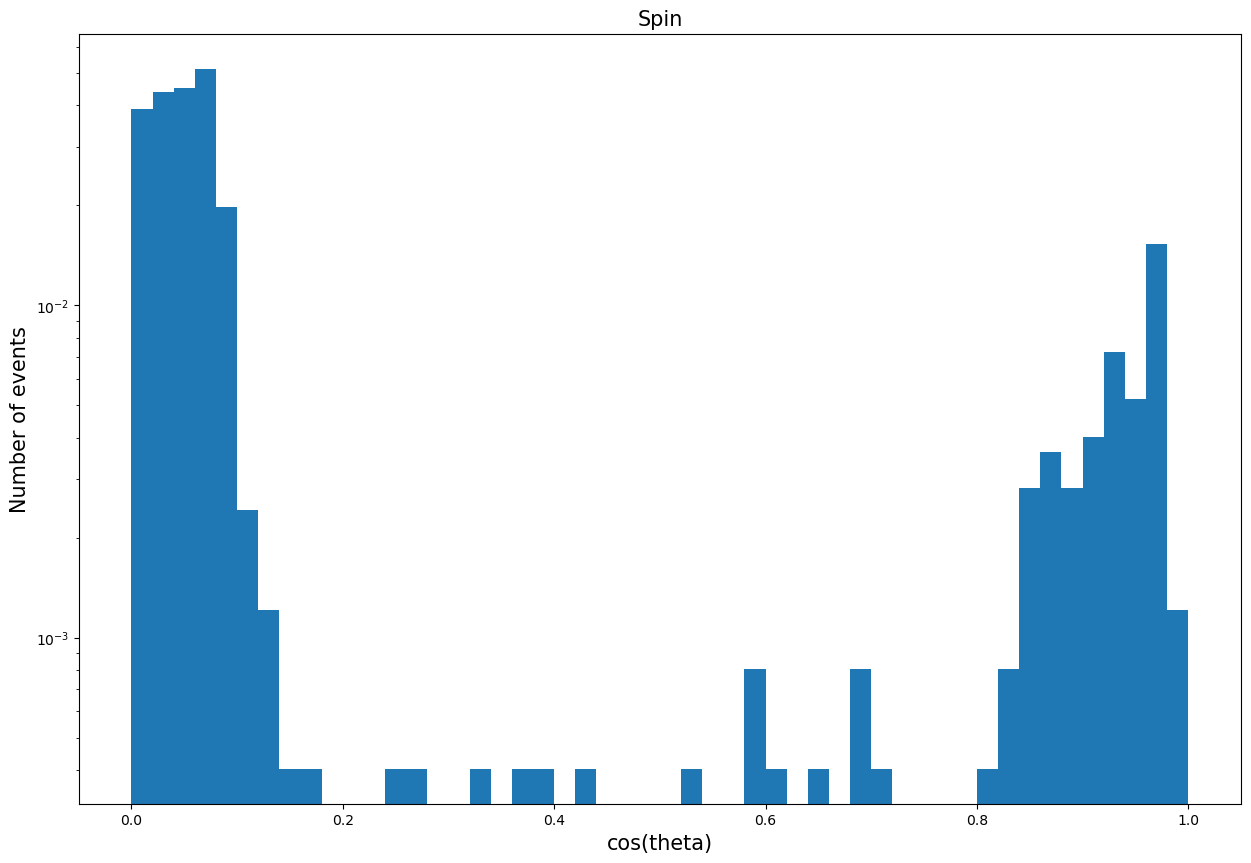

In [3]:
lowerlimit = 0
upperlimit = 1
bins = 50

fig = plt.figure(figsize=(15, 10))
limited_ECM = dataset91[np.abs(dataset91.ECM-91.2) < 0.1]
plt.hist(np.cos(limited_ECM.THETA1), bins=bins, range=(lowerlimit,upperlimit), weights = 1/limited_ECM.LUM)

plt.yscale('log')
plt.xlabel('cos(theta)', fontsize=15)
plt.ylabel('Cross-section', fontsize=15)
plt.title('Spin', fontsize=15) 

plt.show()

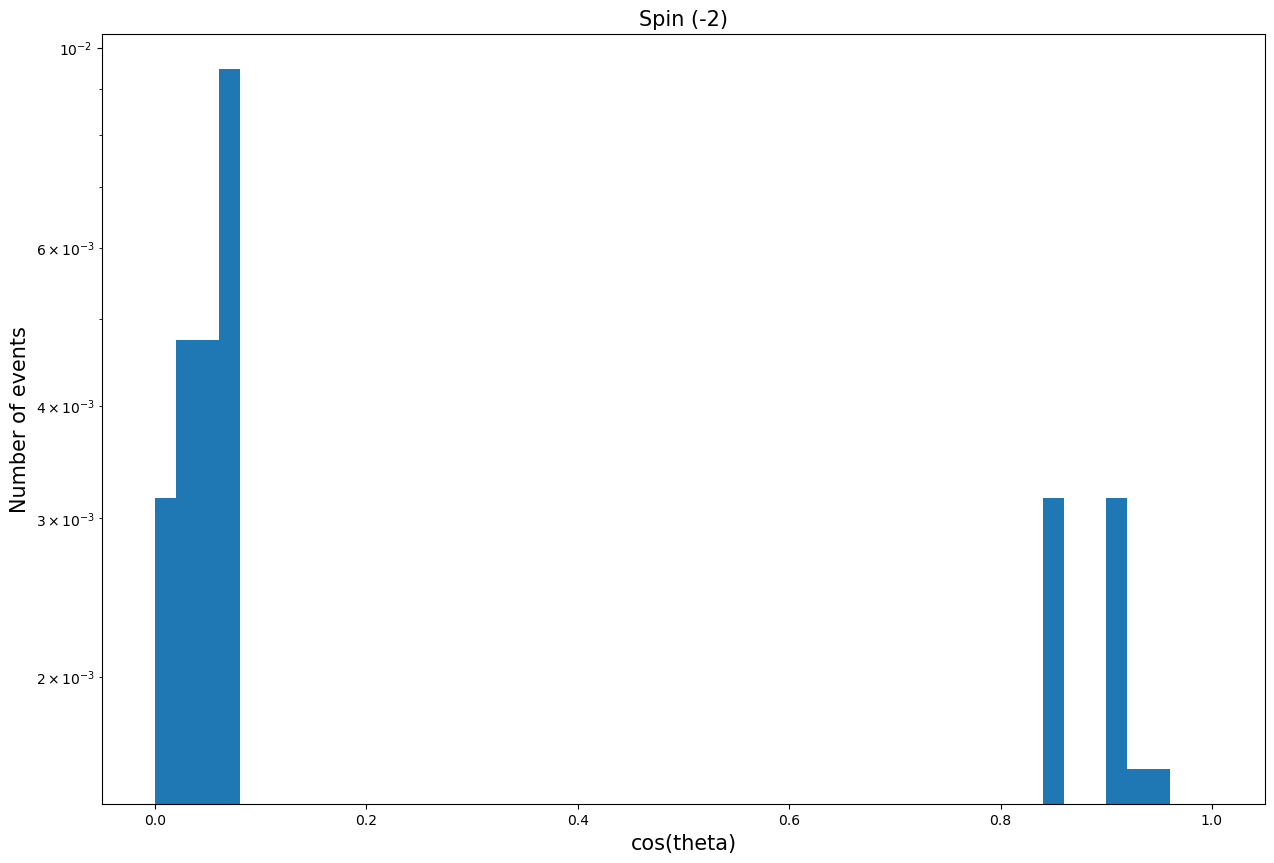

In [4]:
fig = plt.figure(figsize=(15, 10))
limited_ECM = dataset91[np.abs(dataset91.ECM-89.5) < 0.1]
plt.hist(np.cos(limited_ECM.THETA1), bins=bins, range=(lowerlimit,upperlimit), weights = 1/limited_ECM.LUM)

plt.yscale('log')
plt.xlabel('cos(theta)', fontsize=15)
plt.ylabel('Cross-section', fontsize=15)
plt.title('Spin (-2)', fontsize=15) 

plt.show()

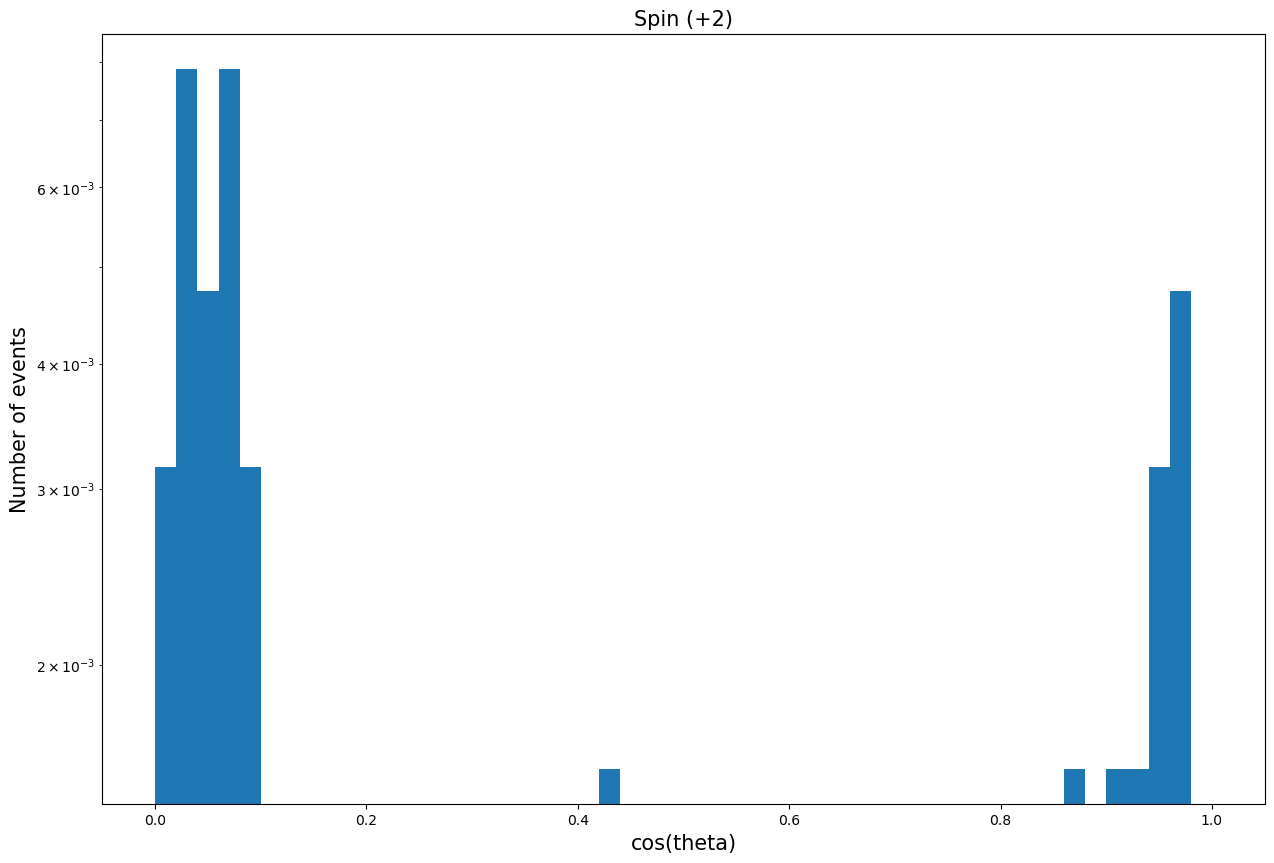

In [5]:
fig = plt.figure(figsize=(15, 10))
limited_ECM = dataset91[np.abs(dataset91.ECM-93) < 0.1]
plt.hist(np.cos(limited_ECM.THETA1), bins=bins, range=(lowerlimit,upperlimit), weights = 1/limited_ECM.LUM)

plt.yscale('log')
plt.xlabel('cos(theta)', fontsize=15)
plt.ylabel('Cross-section', fontsize=15)
plt.title('Spin (+2)', fontsize=15) 

plt.show()

If we assume that luminosity remains constant over the years for the same ECM value, since we only look at specific ECM values, we can assume them to be constant and that way use the entire data:

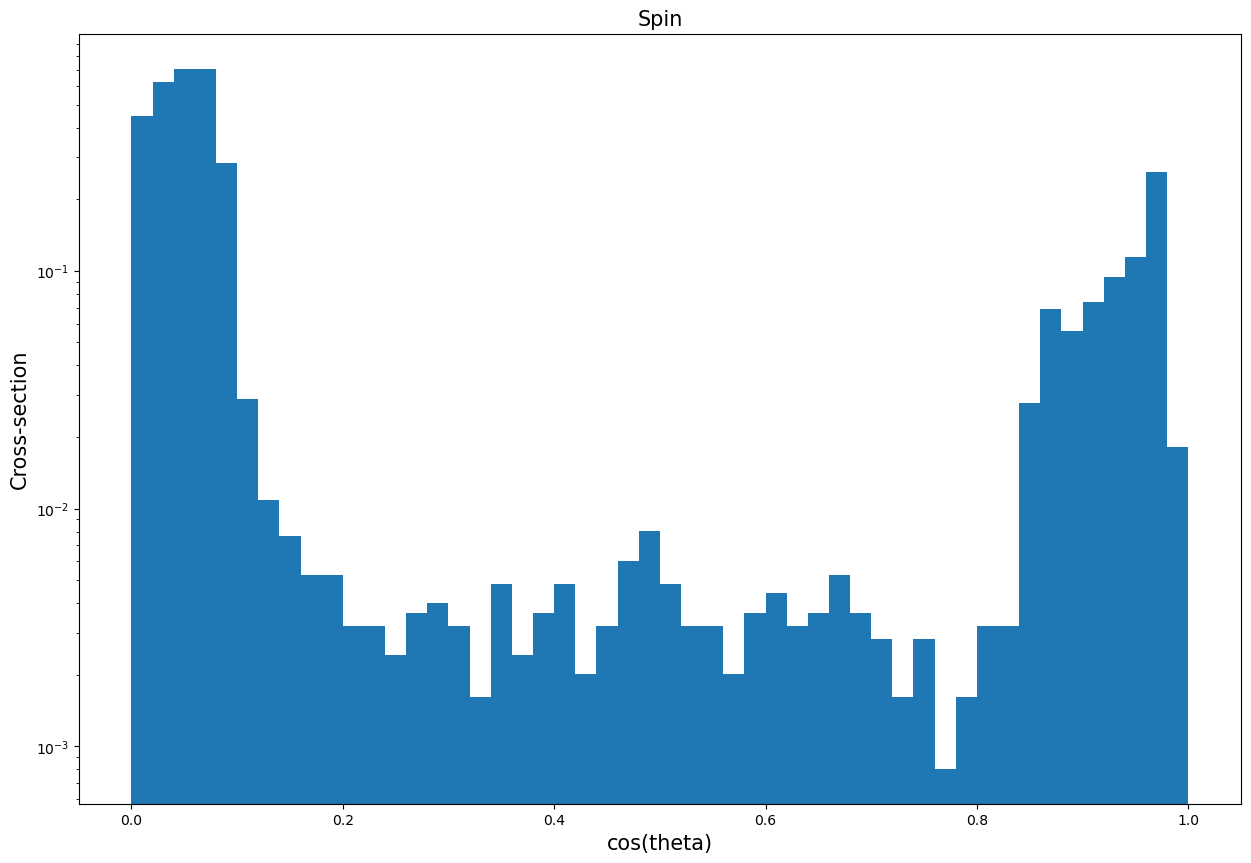

In [8]:
lowerlimit = 0
upperlimit = 1
bins = 50

fig = plt.figure(figsize=(15, 10))
limited_ECM = dataset[np.abs(dataset.ECM-91.2) < 0.2]
plt.hist(np.cos(limited_ECM.THETA1), bins=bins, range=(lowerlimit,upperlimit), weights = [1/2482.5]*len(limited_ECM))

plt.yscale('log')
plt.xlabel('cos(theta)', fontsize=15)
plt.ylabel('Cross-section', fontsize=15)
plt.title('Spin', fontsize=15) 

plt.show()

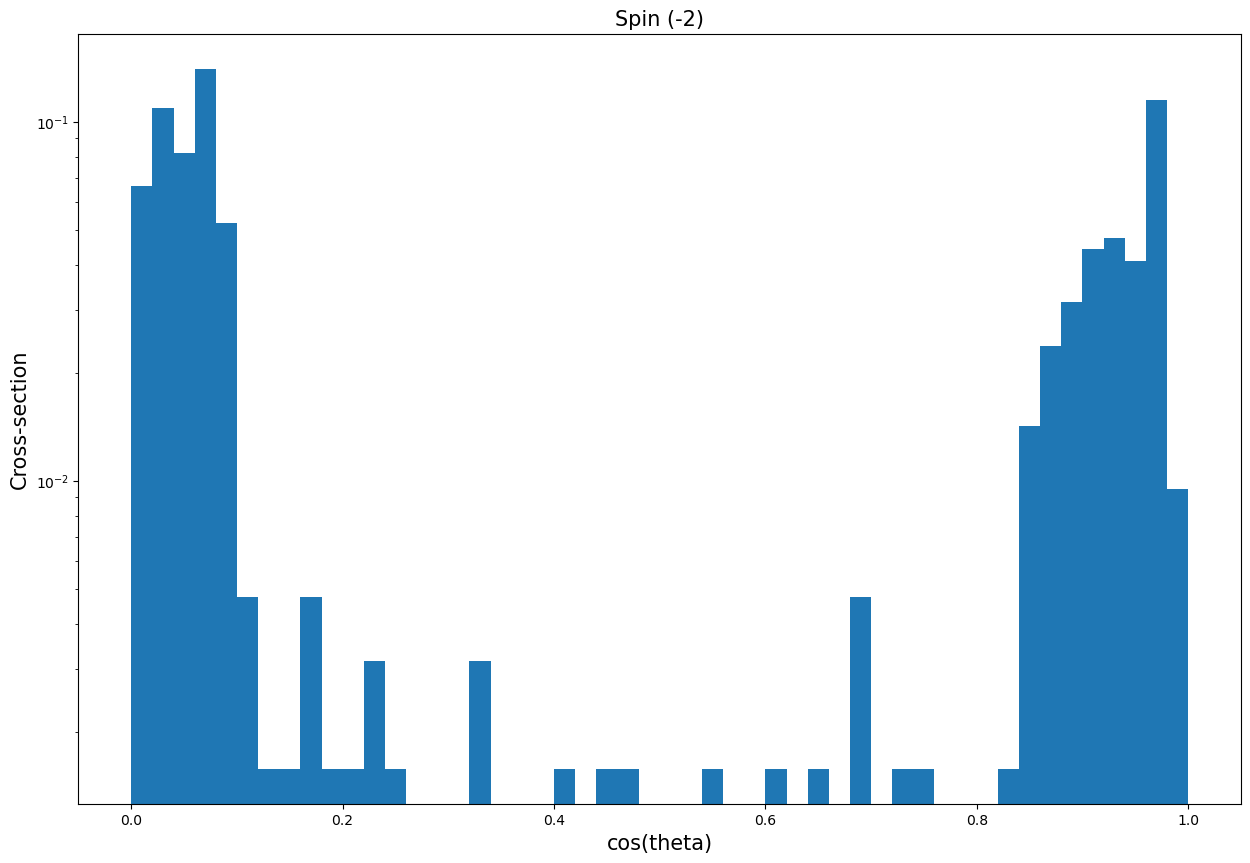

In [10]:
lowerlimit = 0
upperlimit = 1
bins = 50

fig = plt.figure(figsize=(15, 10))
limited_ECM = dataset[np.abs(dataset.ECM-89.5) < 0.2]
plt.hist(np.cos(limited_ECM.THETA1), bins=bins, range=(lowerlimit,upperlimit), weights = [1/632.7]*len(limited_ECM))

plt.yscale('log')
plt.xlabel('cos(theta)', fontsize=15)
plt.ylabel('Cross-section', fontsize=15)
plt.title('Spin (-2)', fontsize=15) 

plt.show()

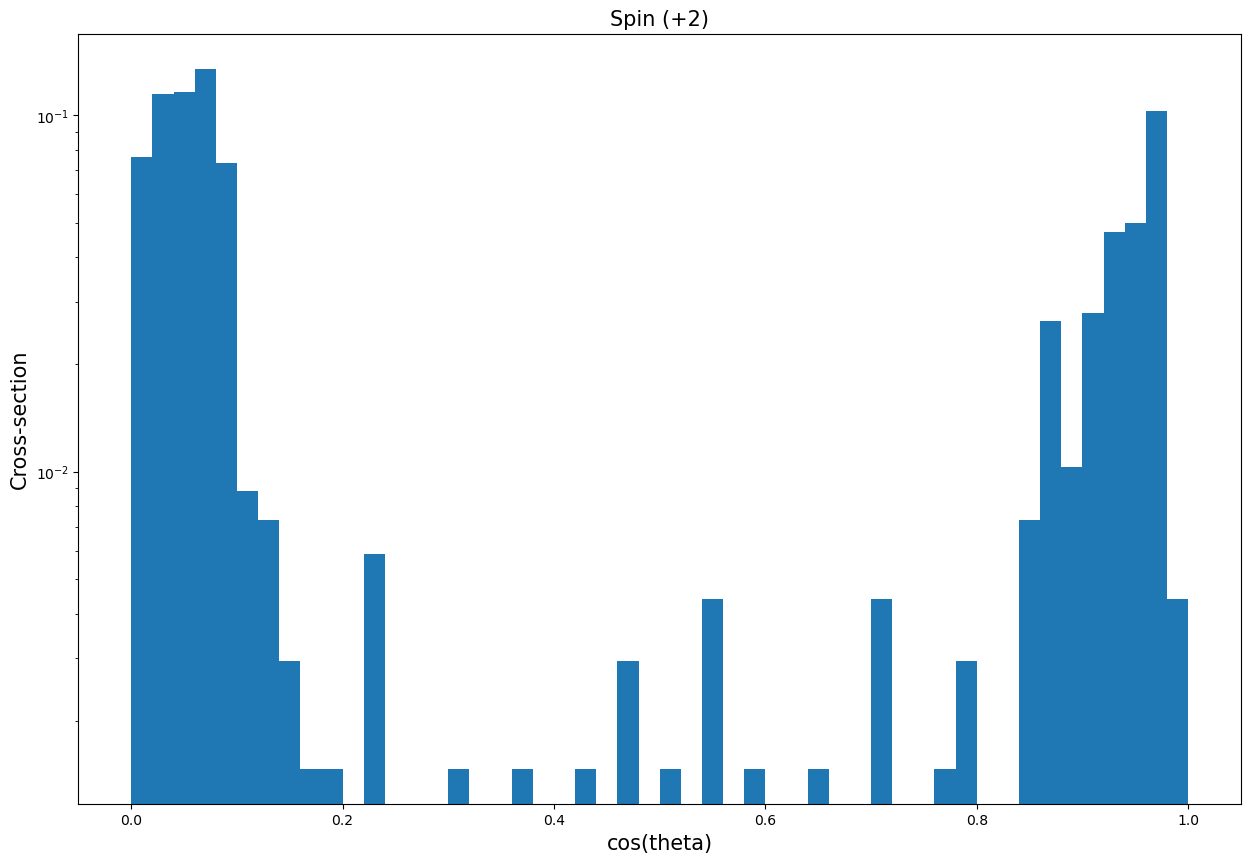

In [13]:
lowerlimit = 0
upperlimit = 1
bins = 50

fig = plt.figure(figsize=(15, 10))
limited_ECM = dataset[np.abs(dataset.ECM-93) < 0.2]
plt.hist(np.cos(limited_ECM.THETA1), bins=bins, range=(lowerlimit,upperlimit), weights = [1/681.2]*len(limited_ECM))

plt.yscale('log')
plt.xlabel('cos(theta)', fontsize=15)
plt.ylabel('Cross-section', fontsize=15)
plt.title('Spin (+2)', fontsize=15) 

plt.show()